# 1. Questions
1. How many survived and how many didn't?
2. Who survived more Male or Female?
3. Did Title acted as a fator in Passenger's survival?
4. Are Passengers travelling along with their family are more likely to survive?
5. What is the survival rate between Port of Embarkation and Passenger’s class fields?
6. Did Passengers with Cabin had better survival rate than those who don't?

# 2. Wrangling

In [4]:
# importing required libraries
%pylab inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [6]:
# loading data
titanic_df = pd.read_csv("/home/piyush/Desktop/p2/titanic_data.csv")

In [7]:
# seeing first five entries of data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# describing the data
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# checking for missing values
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


From above we can see that there are missing values in Age, Embarked and Cabin Fields. Cabin values missing is not a problem since not everyone has a cabin but missing age and Embarked can be a problem to our analysis.

### 2.1 Handeling missing values for age

Since we can't tell someone's age, we will use the titles to group them into titles.
And since Name field contains title, we can extract them and create a new field in titanic_df

In [10]:
# adding titles column in titanic data
titles = []
rare_title = ['Lady', 'the Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']
for data in titanic_df['Name']:
    title = data.split(',')[1].strip(' ').split('.')[0]
    if title in rare_title:
        titles.append('Rare Title')
    elif title in ['Mlle', 'Ms']:
        titles.append('Miss')
    elif title == 'Mme':
        titles.append('Mrs')
    else:
        titles.append(title)
titanic_df['Title'] = pd.Series(titles)

In [11]:
# checking if its title field is added or not
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### 2.2 Handeling for Embarked

On exploring of data we can see that Passenger 62 and 830 are missing Embarkment

Fare of Passenger 62 and 830 are : 80.0,80.0


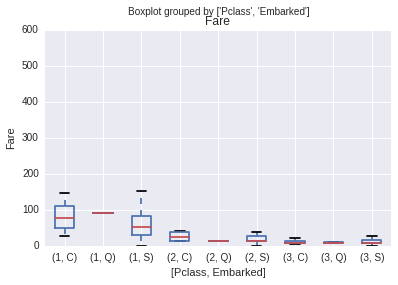

In [12]:
print 'Fare of Passenger 62 and 830 are : '+ str(titanic_df.loc[61,'Fare'])+','+str(titanic_df.loc[829,'Fare'])
# plotting the boxplot of titanic data grouped by Pclass and Embarked
titanic_df.boxplot(column='Fare', by = ['Pclass', 'Embarked'])
plt.ylabel('Fare')

The median fare for a first class passenger departing from Charbourg (‘C’) coincides nicely with the $80 paid by Passenger 62 abs 830. So I think we can replace their embarkment to C.

In [13]:
titanic_df.loc[61,'Embarked'] = 'C'
titanic_df.loc[829,'Embarked'] = 'C'

# 3. Exploration

### 3.1 How many survived and how many didn't?

In [14]:
# ratio of survied to dead passengers
titanic_df_by_survived = titanic_df.groupby(['Survived']).size().reset_index(name="Count")

In [15]:
# printing the data
print titanic_df_by_survived

   Survived  Count
0         0    549
1         1    342


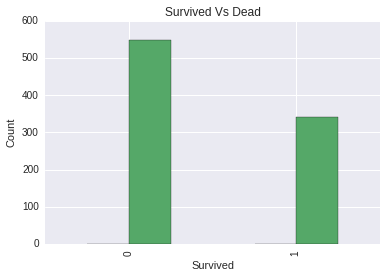

In [16]:
titanic_df_by_survived.plot(kind='bar', legend=False)
plt.title(r'Survived Vs Dead')
plt.xlabel('Survived')
plt.ylabel('Count')

From above we can see that, **342** out of the **891** people in our dataset survived, which corresponds to a **38.4%** level.

### 3.2 Who survived more Male or Female?

In [17]:
# grouping the titanic data by Survived and Sex to analyse the relation between Survival and Sex
titanic_df_by_survived_and_sex = titanic_df.groupby(['Survived','Sex']).size().reset_index(name="Count")

          Count     
Sex      female male
Survived            
0            81  468
1           233  109


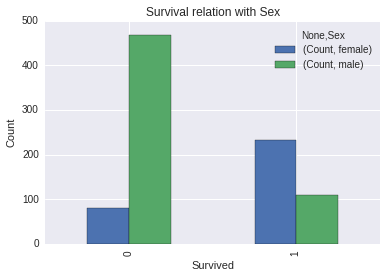

In [18]:
# simplifying table for plot
print titanic_df_by_survived_and_sex.pivot(index='Survived', columns='Sex')

# visualizing the bar plot of survival rate of male and female
titanic_df_by_survived_and_sex.pivot(index='Survived', columns='Sex').plot(kind='bar')
plt.title(r'Survival relation with Sex')
plt.xlabel('Survived')
plt.ylabel('Count')

Axes(0.125,0.125;0.775x0.775)


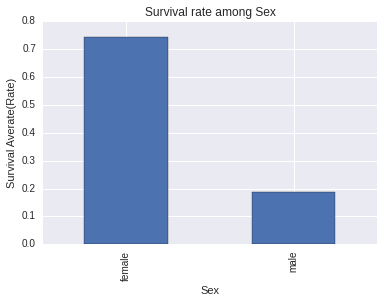

In [28]:
# Survival rate for different family sizes
print titanic_df.groupby(['Sex'])['Survived'].mean().plot(kind = 'bar')
plt.title(r'Survival rate among Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Averate(Rate)')

From above plot, we can see more females survived than males

### 3.3 Did Title acted as a fator in Passenger's survival?

Since, many row is missing age, so we can't group data by ages. Inorder to achieve this we can get the use the title in the name to distribute them into categories

          Count                          
Title    Master Miss   Mr  Mrs Rare Title
Survived                                 
0            17   55  436   26         15
1            23  130   81  100          8


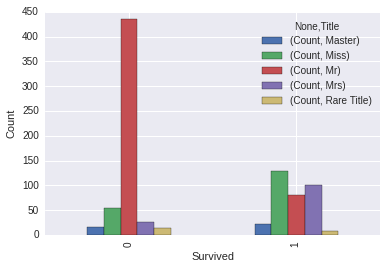

In [29]:
# grouping the titanic data by Survived and Title to analyse the relation between Survival and Title
titanic_df_by_survived_and_title = titanic_df.groupby(['Survived','Title']).size().reset_index(name = 'Count')

#simplifying table for plot
print titanic_df_by_survived_and_title.pivot(index='Survived', columns='Title')

# plotting the data
titanic_df_by_survived_and_title.pivot(index='Survived', columns='Title').plot(kind='bar')
plt.ylabel('Count')

Axes(0.125,0.125;0.775x0.775)


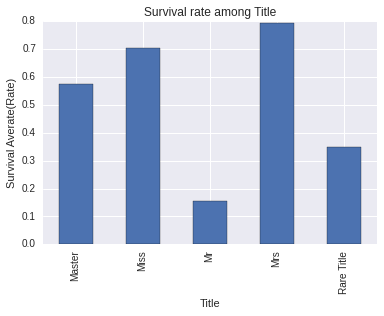

In [30]:
# Survival rate for different family sizes
print titanic_df.groupby(['Title'])['Survived'].mean().plot(kind = 'bar')
plt.title(r'Survival rate among Title')
plt.xlabel('Title')
plt.ylabel('Survival Averate(Rate)')

Hence Women had the most survival rate, followed by Girls. Mens had the lowest survival rate.

### 3.4 Are Passengers travelling along with their family are more likely to survive?

In [31]:
# adding family_size field in titanic_df
titanic_df['Family Size'] = titanic_df['SibSp']+titanic_df['Parch']

             Count       
Survived         0      1
Family Size              
0            374.0  163.0
1             72.0   89.0
2             43.0   59.0
3              8.0   21.0
4             12.0    3.0
5             19.0    3.0
6              8.0    4.0
7              6.0    NaN
10             7.0    NaN


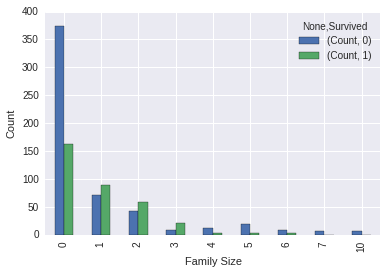

In [32]:
# grouping the titanic data by Survived and Family Size to analyse the relation between Survival and Family Size
# grouping the titanic data by Survived and Title to analyse the relation between Survival and Title
titanic_df_by_survived_and_family = titanic_df.groupby(['Survived','Family Size']).size().reset_index(name = 'Count')

#simplifying table for plot
print titanic_df_by_survived_and_family.pivot(index='Family Size', columns='Survived')

# plotting the data
titanic_df_by_survived_and_family.pivot(index='Family Size', columns='Survived').plot(kind='bar')
plt.ylabel('Count')

From above graph, we can see that there’s a survival penalty to singletons and those with family sizes above 4. 

Axes(0.125,0.125;0.775x0.775)


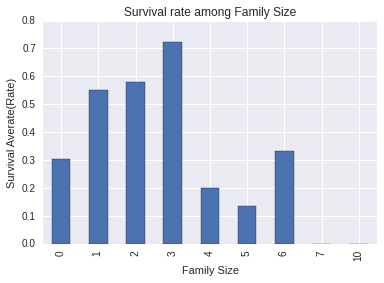

In [33]:
# Survival rate for different family sizes
print titanic_df.groupby(['Family Size'])['Survived'].mean().plot(kind = 'bar')
plt.title(r'Survival rate among Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Averate(Rate)')

We can see that the survival rate of passengers with family size of 1,2 and 3 have more survival rate as compared with other. Also the survival rate of family sizes 0 and 6 has little difference 

### 3.5 What is the survival rate between Port of Embarkation and Passenger’s class fields?

Embarked  Pclass
C         1         0.701149
          2         0.529412
          3         0.378788
Q         1         0.500000
          2         0.666667
          3         0.375000
S         1         0.582677
          2         0.463415
          3         0.189802
Name: Survived, dtype: float64


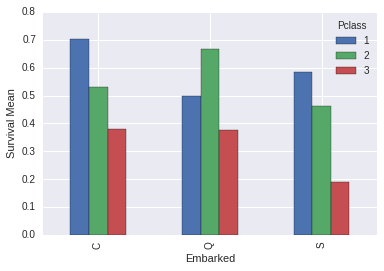

In [34]:
print titanic_df.groupby(['Embarked','Pclass'])['Survived'].mean()
titanic_df.groupby(['Embarked','Pclass'])['Survived'].mean().unstack().plot(kind='bar')
plt.ylabel('Survival Mean')

From above graph we see following observations
* Passengers whose Port of Embarkation is 'C' had good survival rate in Passenger Class 1
* Passengers whose Port of Embarkation is 'Q' had good survival rate in Passenger Class 2
* Passengers whose Port of Embarkation is 'S' had good survival rate in Passenger Class 1

### 3.6. Did Passengers with Cabin had better survival rate than those who don't?

To  handle the missing cabin data, we will create a has_cabin field in titanic data

In [35]:
has_cabin = []
for data in titanic_df['Cabin']:
    if data is nan:
        has_cabin.append(0)
    else:
        has_cabin.append(1)
titanic_df['has_Cabin'] = pd.Series(has_cabin)

Axes(0.125,0.125;0.775x0.775)


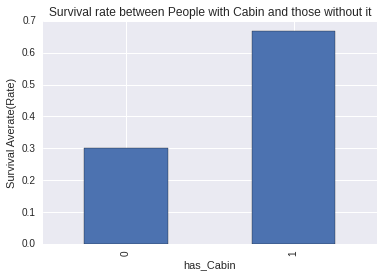

In [36]:
print titanic_df.groupby(['has_Cabin'])['Survived'].mean().plot(kind='bar')
plt.title(r'Survival rate between People with Cabin and those without it')
plt.xlabel('has_Cabin')
plt.ylabel('Survival Averate(Rate)')

We can say from above that the passengers with with no cabin had less survival rate.

# 4. Conclusion

The size of data set was 891.
The missing age data of passengers reduced the accuracy of results otherwise if data was complete, then we would have calculated the age-ranges survival rate.

The data set has missing values in age, Cabin field. Cabin feilds value missing is reasonable since not everybody can be given a Cabin.
We chose to use title field to analyse the data based on their titles bacause since the age field is missing some values, so if we analyse the  data on basis of age, our result will not be trustful.

# References

* http://kaggle.com
* http://pandas.pydata.org/pandas-docs/version/0.18.1/
* http://matplotlib.org